# COMP3217 Security of Cyber-Physical Systems_Coursework 2
- Student ID: 33586675
- Student Name: QICHENG WANG

## Task A

### 1. Library Import

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import random
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, precision_score, recall_score, accuracy_score

### 2. Dataset import

In [157]:
data_train = pd.read_csv('TrainingDataBinary.csv', header=None) # import binary-labelled training data
data_test = pd.read_csv('TestingDataBinary.csv', header=None)# import binary-labelled testing data
data_train

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
0,70.399324,127673.0908,-49.572308,127648.0176,-169.578319,127723.2374,65.689611,605.91099,-57.003571,626.78553,...,0,0,0,0,0,0,0,0,0,0
1,73.688102,130280.7109,-46.300719,130255.6377,-166.278082,130355.9307,71.831719,483.59351,-50.947407,500.98896,...,0,0,0,0,0,0,0,0,0,0
2,73.733939,130305.7842,-46.254883,130280.7109,-166.232245,130381.0040,71.808800,483.59351,-50.913030,500.98896,...,0,0,0,0,0,0,0,0,0,0
3,74.083443,130581.5902,-45.899649,130556.5169,-165.882741,130656.8100,72.152575,482.86107,-50.437475,499.15786,...,0,0,0,0,0,0,0,0,0,0
4,74.553268,131083.0556,-45.424094,131057.9823,-165.424375,131158.2754,72.118198,484.50906,-50.013486,497.69298,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,116.889120,131860.3269,-3.076783,131810.1804,-123.094253,131910.4735,114.780635,376.10794,-5.254023,374.82617,...,0,0,0,0,0,0,0,0,0,0
5996,116.849013,131810.1804,-3.116890,131760.0339,-123.128630,131885.4002,114.769176,376.29105,-5.322778,374.82617,...,0,0,0,0,0,0,0,0,0,0
5997,116.384917,131734.9606,-3.586716,131684.8140,-123.586996,131785.1071,114.299351,376.47416,-5.849899,374.82617,...,0,0,0,0,0,0,0,0,0,0
5998,111.125164,130506.3704,-8.846468,130456.2238,-128.858208,130556.5169,106.667553,478.83265,-13.464508,477.73399,...,0,0,0,0,0,0,0,0,0,0


### 3. Extract Features and Target Data

In [163]:
train_dataset = data_train.values # get the values of all data
random.shuffle(train_dataset) # shuffle the dataset
feature_data = train_dataset[:,0:-1] # assigmn data into features set except first column and last column
target_data = train_dataset[:,-1] # assign the last column data into target set
test_dataset = data_test.values
x_test = test_dataset # assigmn data into features set except first column and last column
feature_data

array([[ 7.03993240e+01,  1.27673091e+05, -4.95723080e+01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 7.36881020e+01,  1.30280711e+05, -4.63007190e+01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 7.37339390e+01,  1.30305784e+05, -4.62548830e+01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-8.41904180e+01,  1.31183349e+05,  1.55827332e+02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.43033184e+02,  1.31459155e+05,  9.69788360e+01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 6.63026760e+01,  1.31434081e+05, -5.36632270e+01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

### 4. Split Train, Test Data

In [164]:
X_train, X_test, y_train, y_test = train_test_split(feature_data, target_data, test_size=0.2, random_state=50) # split the feature and target set into 80% training set and 20% testing set with random seed 50

### 5. Model Trainning

In [165]:
rf = RandomForestClassifier(n_estimators = 1000, min_samples_leaf =1).fit(X_train, y_train) # initialise the randomforest parameters and train the model
print(
    "RandomForest score: %f"
    % rf.score(X_test, y_test)) # output the testing score with test data

RandomForest score: 0.995833


### 6. Evaluation

0.9956548262919019
0.9958719018072084
0.9957626370522079
0.9958333333333333


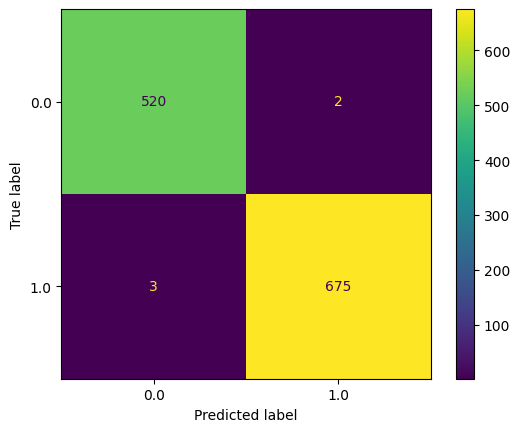

In [166]:
predictions = rf.predict(X_test) # predict the test data
print (precision_score(y_test, predictions, average='macro')) # calculate precision score
print (recall_score(y_test, predictions, average='macro'))# calculate recall score
print (f1_score(y_test, predictions, average='macro'))# calculate f1-score
print (accuracy_score(y_test, predictions))# calculate accuracy score


#get confusion matrix
cm = confusion_matrix(y_test, predictions, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf.classes_)
disp.plot()
plt.show()

In [167]:
# 10-fold cross validation
accuracy_set = cross_val_score(rf,feature_data,target_data,cv =10 )
accuracy_set.mean()

0.9925

### 7. Apply to Testing Data

In [168]:
# Predict the provide testing data
case_predictions = rf.predict(x_test)
case_predictions

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### 8. Output Testing Result

In [58]:
predictions_df = pd.DataFrame(case_predictions) # Turn prediciton array into Dataframe
data_test['128'] = case_predictions # Add the predictions to the 129th column of the data
data_test.to_csv(r".\TestingResultsBinary.csv",index=False,header=False) # export as .csv file

## Task B

### 1. Dataset Import

In [150]:
data_train = pd.read_csv('TrainingDataMulti.csv', header=None) # import multi-labelled training data
data_test = pd.read_csv('TestingDataMulti.csv', header=None)  # import multi-labelled testing data

### 2. Dataset Import

In [151]:
train_dataset = data_train.values # get the values of all data
random.shuffle(train_dataset) # shuffle the dataset
X_train = train_dataset[:,0:-1] # assigmn data into features set except first column and last column
y_train = train_dataset[:,-1] # assign the last column data into target set

test_dataset = data_test.values
x_test = test_dataset # assigmn data into features set except first column and last column

### 3. Extract Features and Target Data

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=50) # split the feature and target set into 80% training set and 20% testing set with random seed 50

### 4. Model Trainning

In [153]:
rf = RandomForestClassifier(n_estimators = 1000, min_samples_leaf =1).fit(X_train, y_train) # initialise the randomforest parameters and train the model
print(
    "RandomForest score: %f"
    % rf.score(X_test, y_test))# output the testing score with test data

RandomForest score: 0.961667


### 5. Evaluation

0.9520247802885344
0.9528352043915715
0.9523231911094737
0.9616666666666667


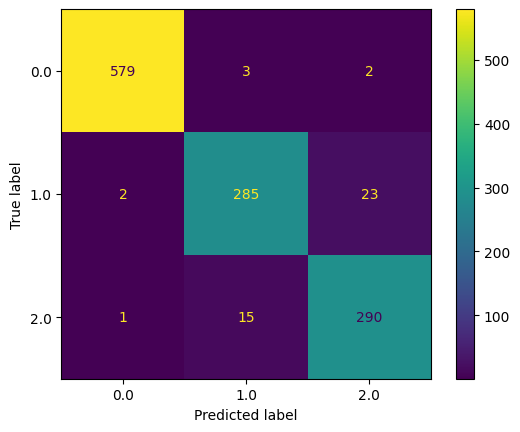

In [154]:
predictions = rf.predict(X_test) # predict the test data
print (precision_score(y_test, predictions, average='macro')) # calculate precision score
print (recall_score(y_test, predictions, average='macro'))# calculate recall score
print (f1_score(y_test, predictions, average='macro'))# calculate f1-score
print (accuracy_score(y_test, predictions))# calculate accuracy score


#get confusion matrix
cm = confusion_matrix(y_test, predictions, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf.classes_)
disp.plot()
plt.show()

In [155]:
# 10-fold cross validation
accuracy_set = cross_val_score(rf,feature_data,target_data,cv =10 )
accuracy_set.mean()

0.9711666666666667

### 6. Apply to Case Data

In [65]:
# Predict the provide testing data
case_predictions = rf.predict(x_test)
case_predictions

array([2., 2., 2., 2., 2., 2., 1., 1., 2., 2., 2., 1., 1., 1., 1., 1., 2.,
       1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1.,
       1., 1., 1., 1., 2., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2.,
       2., 2., 1., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### 7. Output Testing Results

In [66]:
predictions_df = pd.DataFrame(case_predictions)# Turn prediciton array into Dataframe
data_test['128'] = case_predictions# Add the predictions to the 129th column of the data
data_test.to_csv(r".\TestingResultsMulti.csv",index=False,header=False) # export as .csv file